# Weather Dataset EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_weather = pd.read_csv("./datasets/weather.csv")

In [3]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [77]:
df_weather.shape

(8784, 8)

In [4]:
df_weather.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [78]:
df_weather.index

RangeIndex(start=0, stop=8784, step=1)

In [79]:
df_weather.nunique()

Date/Time            8784
Temp_C                533
Dew Point Temp_C      489
Rel Hum_%              83
Wind Speed_km/h        34
Visibility_km          24
Press_kPa             518
Weather Condition      50
dtype: int64

In [80]:
df_weather.count()

Date/Time            8784
Temp_C               8784
Dew Point Temp_C     8784
Rel Hum_%            8784
Wind Speed_km/h      8784
Visibility_km        8784
Press_kPa            8784
Weather Condition    8784
dtype: int64

In [81]:
df_weather.value_counts()

Date/Time        Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  Visibility_km  Press_kPa  Weather Condition
1/1/2012 0:00    -1.8    -3.9              86         4                8.0            101.24     Fog                  1
6/1/2012 12:00    19.3    3.3              35         20               48.3           101.32     Cloudy               1
5/9/2012 7:00     14.3    12.5             89         15               4.8            100.12     Fog                  1
5/9/2012 8:00     14.3    12.3             88         17               6.4            100.12     Fog                  1
5/9/2012 9:00     14.0    12.3             89         9                4.0            100.10     Drizzle,Fog          1
                                                                                                                     ..
12/8/2012 3:00    2.1    -1.5              77         6                25.0           101.18     Cloudy               1
12/8/2012 2:00    2.0    -1.9              75

## 1. Find all the unique 'Wind Speed' values in the data.

In [5]:
df_weather['Wind Speed_km/h'].nunique()

34

In [6]:
df_weather['Wind Speed_km/h'].value_counts()

Wind Speed_km/h
9     830
11    791
13    735
15    719
7     677
17    666
19    616
6     609
20    496
4     474
22    439
24    374
0     309
26    242
28    205
30    161
32    139
33     85
35     53
37     45
39     24
41     22
44     14
43     13
48     13
46     11
52      7
57      5
50      4
2       2
83      1
70      1
63      1
54      1
Name: count, dtype: int64

In [83]:
df_weather['Wind Speed_km/h'].unique()

array([ 4,  7,  6,  9, 15, 13, 20, 22, 19, 24, 30, 35, 39, 32, 33, 26, 44,
       43, 48, 37, 28, 17, 11,  0, 83, 70, 57, 46, 41, 52, 50, 63, 54,  2])

## 2. Find the number of times when the 'Weather is exactly Clear'.

In [12]:
len(df_weather[df_weather['Weather'] == 'Clear'])

1326

In [18]:
df_weather[df_weather['Weather'] == 'Clear']['Weather'].count()

1326

In [85]:
# Using groupby
# Note that 'Weather' column has been changed to 'Weather Condition'
df_weather.groupby('Weather Condition').get_group('Clear')

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
67,1/3/2012 19:00,-16.9,-24.8,50,24,25.0,101.74,Clear
114,1/5/2012 18:00,-7.1,-14.4,56,11,25.0,100.71,Clear
115,1/5/2012 19:00,-9.2,-15.4,61,7,25.0,100.80,Clear
116,1/5/2012 20:00,-9.8,-15.7,62,9,25.0,100.83,Clear
117,1/5/2012 21:00,-9.0,-14.8,63,13,25.0,100.83,Clear
...,...,...,...,...,...,...,...,...
8646,12/26/2012 6:00,-13.4,-14.8,89,4,25.0,102.47,Clear
8698,12/28/2012 10:00,-6.1,-8.6,82,19,24.1,101.27,Clear
8713,12/29/2012 1:00,-11.9,-13.6,87,11,25.0,101.31,Clear
8714,12/29/2012 2:00,-11.8,-13.1,90,13,25.0,101.33,Clear


## 3. Find the number of times when the 'Wind Speed was exactly 4 km/h'.

In [17]:
df_weather[df_weather['Wind Speed_km/h'] == 4]["Wind Speed_km/h"].count()

474

In [19]:
len(df_weather[df_weather['Wind Speed_km/h'] == 4])

474

In [23]:
df_weather.loc[df_weather['Wind Speed_km/h'] == 4]['Wind Speed_km/h'].count()

474

In [24]:
len(df_weather.loc[df_weather['Wind Speed_km/h'] == 4])

474

## 4. Find out all the Null Values in the data.

In [25]:
df_weather.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [26]:
df_weather.isna().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [86]:
df_weather.notnull().sum()

Date/Time            8784
Temp_C               8784
Dew Point Temp_C     8784
Rel Hum_%            8784
Wind Speed_km/h      8784
Visibility_km        8784
Press_kPa            8784
Weather Condition    8784
dtype: int64

## 5. Rename the column name 'Weather' of the dataframe to 'Weather Condition'.

In [28]:
df_weather.rename(columns={'Weather': 'Weather Condition'}, inplace=True)

In [29]:
df_weather.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [82]:
df_weather['Weather Condition'].value_counts()

Weather Condition
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle      

## 6. What is the mean 'Visibility' ?

In [90]:
df_weather.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather Condition'],
      dtype='object')

In [91]:
df_weather[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']].mean()

Temp_C                8.798144
Dew Point Temp_C      2.555294
Rel Hum_%            67.431694
Wind Speed_km/h      14.945469
Visibility_km        27.664447
Press_kPa           101.051623
dtype: float64

In [30]:
df_weather['Visibility_km'].mean()

27.664446721311478

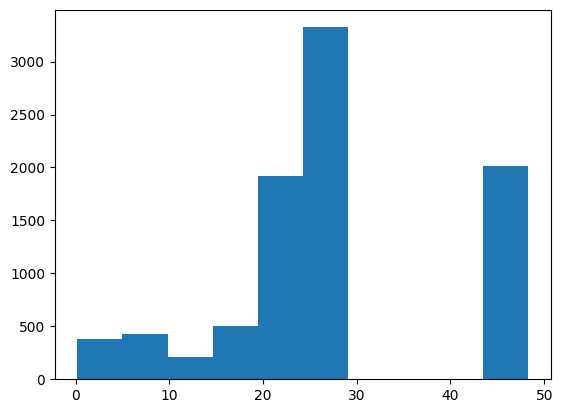

In [35]:
plt.hist(df_weather['Visibility_km'])
plt.show()

## 7. What is the Standard Deviation of 'Pressure'  in this data?

In [36]:
df_weather['Press_kPa'].std()

0.8440047459486483

In [38]:
df_weather['Press_kPa'].mean()

101.05162340619307

<Axes: ylabel='Frequency'>

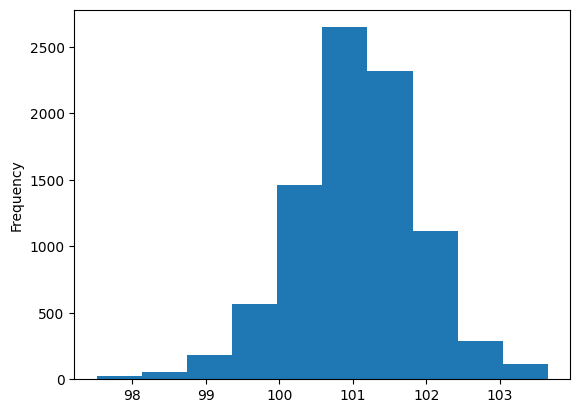

In [37]:
df_weather['Press_kPa'].plot(kind='hist')

## 8. What is the Variance of 'Relative Humidity' in this data ?

<Axes: ylabel='Frequency'>

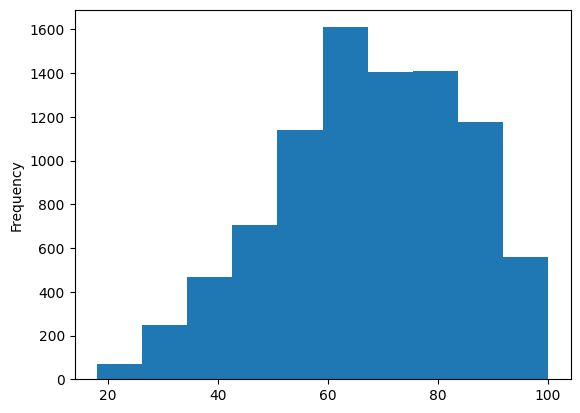

In [39]:
df_weather['Rel Hum_%'].plot(kind='hist')

In [40]:
df_weather['Rel Hum_%'].var()

286.24855019850196

## 9. Find all instances when 'Snow' was recorded.

In [48]:
df_weather.loc[df_weather['Weather Condition'] == 'Snow']

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
55,1/3/2012 7:00,-14.0,-19.5,63,19,25.0,100.95,Snow
84,1/4/2012 12:00,-13.7,-21.7,51,11,24.1,101.25,Snow
86,1/4/2012 14:00,-11.3,-19.0,53,7,19.3,100.97,Snow
87,1/4/2012 15:00,-10.2,-16.3,61,11,9.7,100.89,Snow
88,1/4/2012 16:00,-9.4,-15.5,61,13,19.3,100.79,Snow
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [95]:
df_weather[df_weather['Weather Condition'].str.contains('Snow')].count()

Date/Time            583
Temp_C               583
Dew Point Temp_C     583
Rel Hum_%            583
Wind Speed_km/h      583
Visibility_km        583
Press_kPa            583
Weather Condition    583
dtype: int64

## 10. Find all instances when 'Wind Speed is above 24' and 'Visibility is 25'.

In [57]:
df_weather[(df_weather['Wind Speed_km/h'] > 24) & (df_weather['Visibility_km'] == 25)]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
23,1/1/2012 23:00,5.3,2.0,79,30,25.0,99.31,Cloudy
24,1/2/2012 0:00,5.2,1.5,77,35,25.0,99.26,Rain Showers
25,1/2/2012 1:00,4.6,0.0,72,39,25.0,99.26,Cloudy
26,1/2/2012 2:00,3.9,-0.9,71,32,25.0,99.26,Mostly Cloudy
27,1/2/2012 3:00,3.7,-1.5,69,33,25.0,99.30,Mostly Cloudy
...,...,...,...,...,...,...,...,...
8705,12/28/2012 17:00,-8.6,-12.0,76,26,25.0,101.34,Mainly Clear
8753,12/30/2012 17:00,-12.1,-15.8,74,28,25.0,101.26,Mainly Clear
8755,12/30/2012 19:00,-13.4,-16.5,77,26,25.0,101.47,Mainly Clear
8759,12/30/2012 23:00,-12.1,-15.1,78,28,25.0,101.52,Mostly Cloudy


**Use back ticks ( ` ) whenever you have columns with spaces in between characters when using queries** 

In [55]:
df_weather.query("`Wind Speed_km/h` > 24 and Visibility_km == 25")

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
23,1/1/2012 23:00,5.3,2.0,79,30,25.0,99.31,Cloudy
24,1/2/2012 0:00,5.2,1.5,77,35,25.0,99.26,Rain Showers
25,1/2/2012 1:00,4.6,0.0,72,39,25.0,99.26,Cloudy
26,1/2/2012 2:00,3.9,-0.9,71,32,25.0,99.26,Mostly Cloudy
27,1/2/2012 3:00,3.7,-1.5,69,33,25.0,99.30,Mostly Cloudy
...,...,...,...,...,...,...,...,...
8705,12/28/2012 17:00,-8.6,-12.0,76,26,25.0,101.34,Mainly Clear
8753,12/30/2012 17:00,-12.1,-15.8,74,28,25.0,101.26,Mainly Clear
8755,12/30/2012 19:00,-13.4,-16.5,77,26,25.0,101.47,Mainly Clear
8759,12/30/2012 23:00,-12.1,-15.1,78,28,25.0,101.52,Mostly Cloudy


## 11. What is the Mean value of each column against each 'Weather Condition ?

In [65]:
df_weather_2 = df_weather.drop('Date/Time', axis=1)

In [67]:
df_weather_2.groupby('Weather Condition').mean()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather Condition,,,,,,
Clear,6.825716,0.089367,64.497738,10.557315,30.153243,101.587443
Cloudy,7.970544,2.375810,69.592593,16.127315,26.625752,100.911441
Drizzle,7.353659,5.504878,88.243902,16.097561,17.931707,100.435366
"Drizzle,Fog",8.067500,7.033750,93.275000,11.862500,5.257500,100.786625
"Drizzle,Ice Pellets,Fog",0.400000,-0.700000,92.000000,20.000000,4.000000,100.790000
"Drizzle,Snow",1.050000,0.150000,93.500000,14.000000,10.500000,100.890000
"Drizzle,Snow,Fog",0.693333,0.120000,95.866667,15.533333,5.513333,99.281333
Fog,4.303333,3.159333,92.286667,7.946667,6.248000,101.184067
Freezing Drizzle,-5.657143,-8.000000,83.571429,16.571429,9.200000,100.202857


## 12. What is the Minimum & Maximum value of each column against each 'Weather Condition ?

In [69]:
# Minimum value
df_weather_2.groupby('Weather Condition').min()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather Condition,,,,,,
Clear,-23.3,-28.5,20,0,11.3,99.52
Cloudy,-21.4,-26.8,18,0,11.3,98.39
Drizzle,1.1,-0.2,74,0,6.4,97.84
"Drizzle,Fog",0.0,-1.6,85,0,1.0,98.65
"Drizzle,Ice Pellets,Fog",0.4,-0.7,92,20,4.0,100.79
"Drizzle,Snow",0.9,0.1,92,9,9.7,100.63
"Drizzle,Snow,Fog",0.3,-0.1,92,7,2.4,97.79
Fog,-16.0,-17.2,80,0,0.2,98.31
Freezing Drizzle,-9.0,-12.2,78,6,4.8,98.44


In [70]:
# Maximum value
df_weather_2.groupby('Weather Condition').max()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather Condition,,,,,,
Clear,32.8,20.4,99,33,48.3,103.63
Cloudy,30.5,22.6,99,54,48.3,103.65
Drizzle,18.8,17.7,96,30,25.0,101.56
"Drizzle,Fog",19.9,19.1,100,28,9.7,102.07
"Drizzle,Ice Pellets,Fog",0.4,-0.7,92,20,4.0,100.79
"Drizzle,Snow",1.2,0.2,95,19,11.3,101.15
"Drizzle,Snow,Fog",1.1,0.6,98,32,9.7,100.15
Fog,20.8,19.6,100,22,9.7,103.04
Freezing Drizzle,-2.3,-3.3,93,26,12.9,101.02


## 13. Show all the Records where Weather Condition is Fog.

In [71]:
df_weather[df_weather['Weather Condition'] == 'Fog']

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
5,1/1/2012 5:00,-1.4,-3.3,87,9,6.4,101.27,Fog
6,1/1/2012 6:00,-1.5,-3.1,89,7,6.4,101.29,Fog
...,...,...,...,...,...,...,...,...
8716,12/29/2012 4:00,-16.0,-17.2,90,6,9.7,101.25,Fog
8717,12/29/2012 5:00,-14.8,-15.9,91,4,6.4,101.25,Fog
8718,12/29/2012 6:00,-13.8,-15.3,88,4,9.7,101.25,Fog
8719,12/29/2012 7:00,-14.8,-16.4,88,7,8.0,101.22,Fog


## 14. Find all instances when 'Weather is Clear' or 'Visibility is above 40'.

In [74]:
df_weather[(df_weather['Weather Condition'] == 'Clear') | (df_weather['Visibility_km'] > 40)]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
67,1/3/2012 19:00,-16.9,-24.8,50,24,25.0,101.74,Clear
106,1/5/2012 10:00,-6.0,-10.0,73,17,48.3,100.45,Mainly Clear
107,1/5/2012 11:00,-5.6,-10.2,70,22,48.3,100.41,Mainly Clear
108,1/5/2012 12:00,-4.7,-9.6,69,20,48.3,100.38,Mainly Clear
109,1/5/2012 13:00,-4.4,-9.7,66,26,48.3,100.40,Mainly Clear
...,...,...,...,...,...,...,...,...
8749,12/30/2012 13:00,-12.4,-16.2,73,37,48.3,100.92,Mostly Cloudy
8750,12/30/2012 14:00,-11.8,-16.1,70,37,48.3,100.96,Mainly Clear
8751,12/30/2012 15:00,-11.3,-15.6,70,32,48.3,101.05,Mainly Clear
8752,12/30/2012 16:00,-11.4,-15.5,72,26,48.3,101.15,Mainly Clear


## 15. Find all instances when :
A. 'Weather is Clear' and 'Relative Humidity is greater than 50'<br>
or<br>
B. 'Visibility is above 40'


In [76]:
df_weather[(df_weather['Weather Condition'] == 'Clear') & (df_weather['Rel Hum_%'] > 50) | (df_weather['Visibility_km'] > 40)]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
106,1/5/2012 10:00,-6.0,-10.0,73,17,48.3,100.45,Mainly Clear
107,1/5/2012 11:00,-5.6,-10.2,70,22,48.3,100.41,Mainly Clear
108,1/5/2012 12:00,-4.7,-9.6,69,20,48.3,100.38,Mainly Clear
109,1/5/2012 13:00,-4.4,-9.7,66,26,48.3,100.40,Mainly Clear
110,1/5/2012 14:00,-5.1,-10.7,65,22,48.3,100.46,Mainly Clear
...,...,...,...,...,...,...,...,...
8749,12/30/2012 13:00,-12.4,-16.2,73,37,48.3,100.92,Mostly Cloudy
8750,12/30/2012 14:00,-11.8,-16.1,70,37,48.3,100.96,Mainly Clear
8751,12/30/2012 15:00,-11.3,-15.6,70,32,48.3,101.05,Mainly Clear
8752,12/30/2012 16:00,-11.4,-15.5,72,26,48.3,101.15,Mainly Clear


In [96]:
# Using query
df_weather.query("`Weather Condition` == 'Clear' & `Rel Hum_%` > 50 | Visibility_km > 40")

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
106,1/5/2012 10:00,-6.0,-10.0,73,17,48.3,100.45,Mainly Clear
107,1/5/2012 11:00,-5.6,-10.2,70,22,48.3,100.41,Mainly Clear
108,1/5/2012 12:00,-4.7,-9.6,69,20,48.3,100.38,Mainly Clear
109,1/5/2012 13:00,-4.4,-9.7,66,26,48.3,100.40,Mainly Clear
110,1/5/2012 14:00,-5.1,-10.7,65,22,48.3,100.46,Mainly Clear
...,...,...,...,...,...,...,...,...
8749,12/30/2012 13:00,-12.4,-16.2,73,37,48.3,100.92,Mostly Cloudy
8750,12/30/2012 14:00,-11.8,-16.1,70,37,48.3,100.96,Mainly Clear
8751,12/30/2012 15:00,-11.3,-15.6,70,32,48.3,101.05,Mainly Clear
8752,12/30/2012 16:00,-11.4,-15.5,72,26,48.3,101.15,Mainly Clear


In [97]:
# Using literal 'and' and 'or' instead of symbols (& , |)
df_weather.query("`Weather Condition` == 'Clear' and `Rel Hum_%` > 50 or Visibility_km > 40")

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
106,1/5/2012 10:00,-6.0,-10.0,73,17,48.3,100.45,Mainly Clear
107,1/5/2012 11:00,-5.6,-10.2,70,22,48.3,100.41,Mainly Clear
108,1/5/2012 12:00,-4.7,-9.6,69,20,48.3,100.38,Mainly Clear
109,1/5/2012 13:00,-4.4,-9.7,66,26,48.3,100.40,Mainly Clear
110,1/5/2012 14:00,-5.1,-10.7,65,22,48.3,100.46,Mainly Clear
...,...,...,...,...,...,...,...,...
8749,12/30/2012 13:00,-12.4,-16.2,73,37,48.3,100.92,Mostly Cloudy
8750,12/30/2012 14:00,-11.8,-16.1,70,37,48.3,100.96,Mainly Clear
8751,12/30/2012 15:00,-11.3,-15.6,70,32,48.3,101.05,Mainly Clear
8752,12/30/2012 16:00,-11.4,-15.5,72,26,48.3,101.15,Mainly Clear
